<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [22]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite -o survey-results-public.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  201M    0 98304    0     0  72999      0  0:48:16  0:00:01  0:48:15 73142
  2  201M    2 5134k    0     0  2187k      0  0:01:34  0:00:02  0:01:32 2189k
 12  201M   12 25.6M    0     0  7309k      0  0:00:28  0:00:03  0:00:25 7315k
 15  201M   15 30.2M    0     0  7018k      0  0:00:29  0:00:04  0:00:25 7023k
 23  201M   23 48.2M    0     0  8684k      0  0:00:23  0:00:05  0:00:18 9361k
 24  201M   24 49.4M    0     0  7902k      0  0:00:26  0:00:06  0:00:20 9986k
 33  201M   33 67.0M    0     0  9343k      0  0:00:22  0:00:07  0:00:15 12.4M
 35  201M   35 71.1M    0     0  8728k      0  0:00:23  0:00:08  0:00:15 9799k
 37  201M   37 75.8M    0     0  8306k      0  0:00

#### 2. Connect to the Database


**Install the needed libraries**


In [23]:
# !pip install pandas

In [24]:
# !pip install matplotlib

In [25]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [26]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [27]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [28]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [55]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    df_clean = df[(df[col] >= lower_bound) &
                  (df[col] <= upper_bound)]
    
    return df_clean

In [56]:
# your code goes here
filtered = pd.read_sql_query('''select CompTotal from main''', conn)
filtered = filtered.dropna()
filtered['CompTotal'] = filtered['CompTotal'].apply(lambda x : (x-filtered['CompTotal'].min())/(filtered['CompTotal'].max()-filtered['CompTotal'].min()))
filtered = remove_outliers(filtered, 'CompTotal')

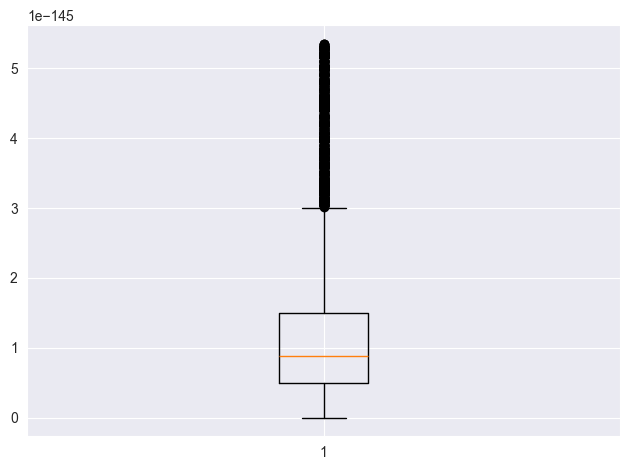

In [57]:
plt.boxplot(x=filtered['CompTotal'])
plt.tight_layout()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


In [45]:
# your code goes here
def get_age_midpoint(age_range):
    if age_range == 'Under 18 years old':
        return 17  # Assuming average of 0-17
    elif age_range == '65 years or older':
        return 75  # Assuming average of 65-85
    elif age_range == 'Prefer not to say':
        return None
    else:
        ages = [int(x) for x in age_range.split()[0].split('-')]
        return sum(ages) / 2


In [48]:
filtered = pd.read_sql_query('''select Age from main''', conn)
filtered['Age'] = filtered['Age'].apply(get_age_midpoint)
filtered = filtered.dropna()

{'whiskers': [<matplotlib.lines.Line2D at 0x1ae56e939d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ae57e84750>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ae57ad2710>],
 'medians': [<matplotlib.lines.Line2D at 0x1ae57e87310>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ae57dd8510>],
 'means': []}

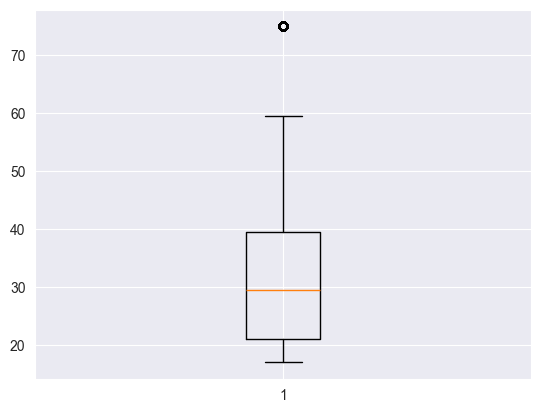

In [49]:
plt.boxplot(x=filtered['Age'])

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


In [50]:
import seaborn as sns

In [58]:
# your code goes here
filtered = pd.read_sql_query('''select Age, CompTotal from main''', conn)
filtered = filtered.dropna()
filtered = remove_outliers(filtered, 'CompTotal')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '25-34 years old'),
  Text(1, 0, '35-44 years old'),
  Text(2, 0, '45-54 years old'),
  Text(3, 0, '55-64 years old'),
  Text(4, 0, '18-24 years old'),
  Text(5, 0, '65 years or older'),
  Text(6, 0, 'Under 18 years old'),
  Text(7, 0, 'Prefer not to say')])

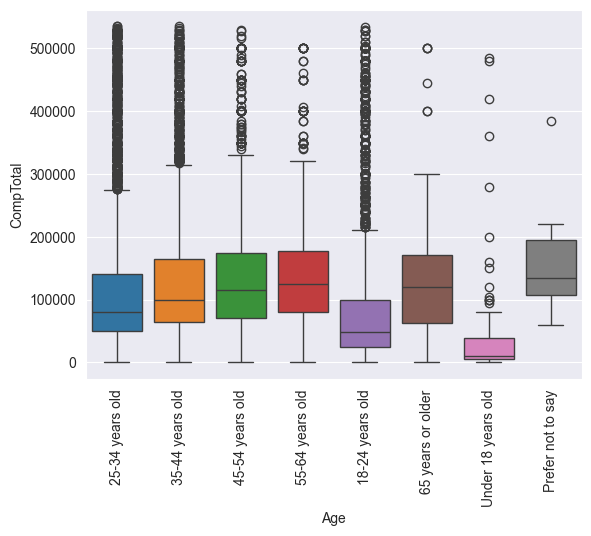

In [59]:
sns.boxplot(data=filtered, x='Age', y='CompTotal', hue='Age')
plt.xticks(rotation=90)

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85],
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '12.5'),
  Text(14, 0, '13.0'),
  Text(15, 0, '14.0'),
  Text(16, 0, '15.0'),
  Text(17, 0, '16.0'),
  Text(18, 0, '17.0'),
  Text(19, 0, '17.5'),
  Text(20, 0, '18.0'),
  Text(21, 0, '19.0'),
  Text(

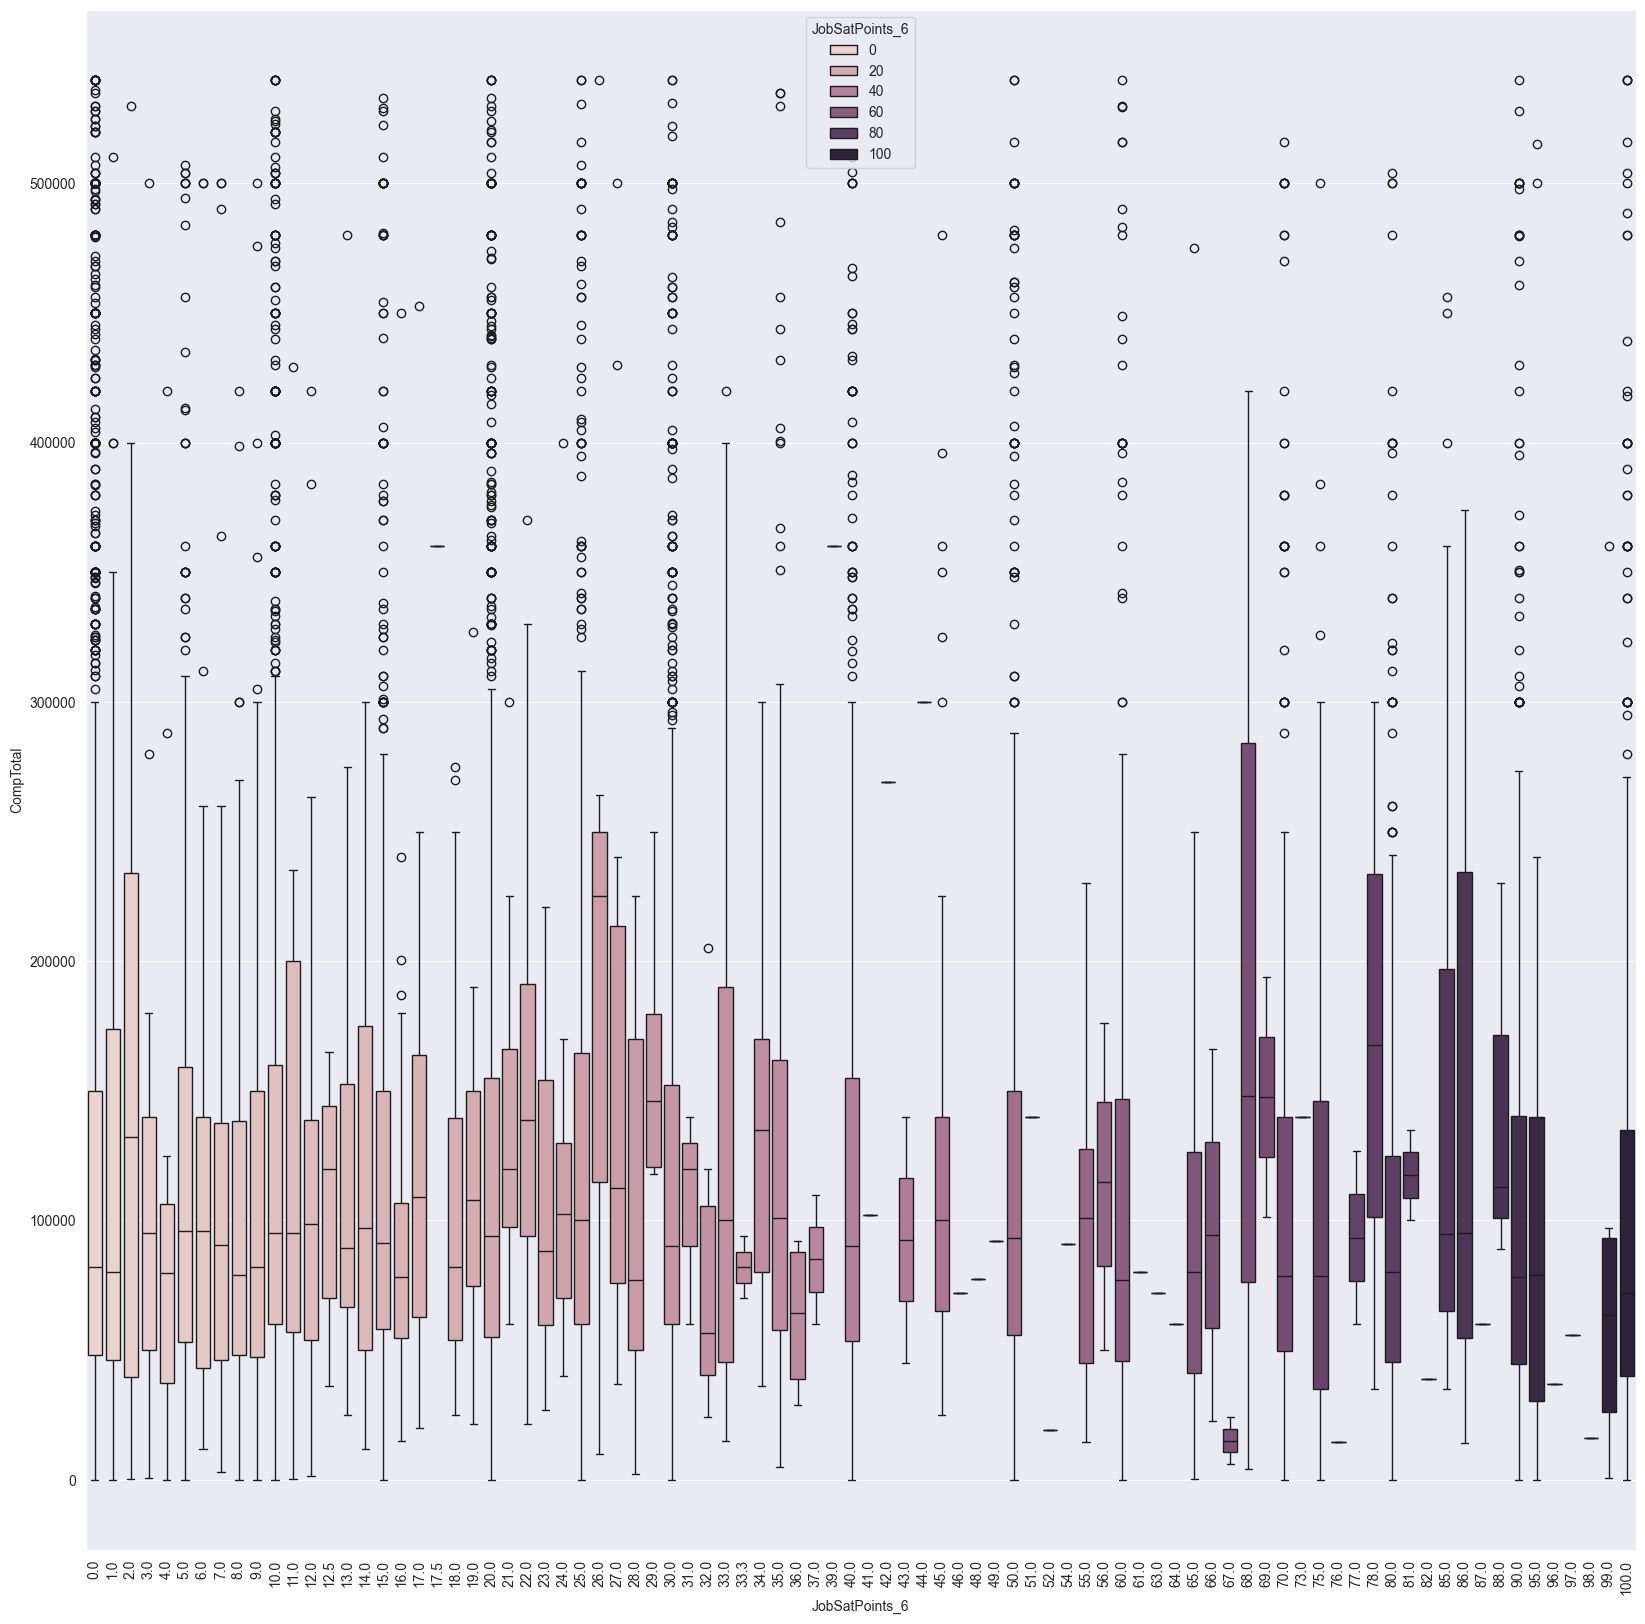

In [63]:
# your code goes here
filtered = pd.read_sql_query('''select JobSatPoints_6, CompTotal from main''', conn)
filtered = filtered.dropna()
filtered = remove_outliers(filtered, 'CompTotal')
plt.figure(figsize=(20,20))
sns.boxplot(data=filtered, x='JobSatPoints_6', y='CompTotal', hue='JobSatPoints_6')
plt.xticks(rotation=90)

### Task 3: Visualizing the Composition of Data


In [64]:
column_query = pd.read_sql_query("PRAGMA table_info(main)", conn)
columns = column_query['name'].tolist()
print(columns)

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',

**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [74]:
filtered = pd.read_sql_query('''select DevType, JobSatPoints_6 from main''', conn)
filtered

,DevType,JobSatPoints_6
0,None,NaN
1,"Developer, full-stack",0.0
2,Developer Experience,NaN
3,"Developer, full-stack",NaN
4,"Developer, full-stack",NaN
...,...,...
65432,Blockchain,NaN
65433,None,NaN
65434,"Developer, mobile",NaN
65435,"Developer, back-end",0.0


In [75]:
# your code goes here
filtered = pd.read_sql_query('''
    SELECT DevType, JobSatPoints_6 
    FROM main 
    WHERE DevType IN (
        SELECT DevType 
        FROM main 
        GROUP BY DevType 
        ORDER BY COUNT(DevType) DESC 
        LIMIT 5
    )
''', conn)
filtered = filtered.dropna()
filtered = remove_outliers(filtered, 'JobSatPoints_6')
filtered

,DevType,JobSatPoints_6
0,"Developer, full-stack",0.0
6,"Developer, back-end",30.0
7,"Developer, full-stack",0.0
10,"Developer, full-stack",60.0
12,"Developer, back-end",20.0
...,...,...
39065,"Developer, front-end",20.0
39066,"Developer, back-end",20.0
39067,"Developer, full-stack",0.0
39109,"Developer, full-stack",0.0


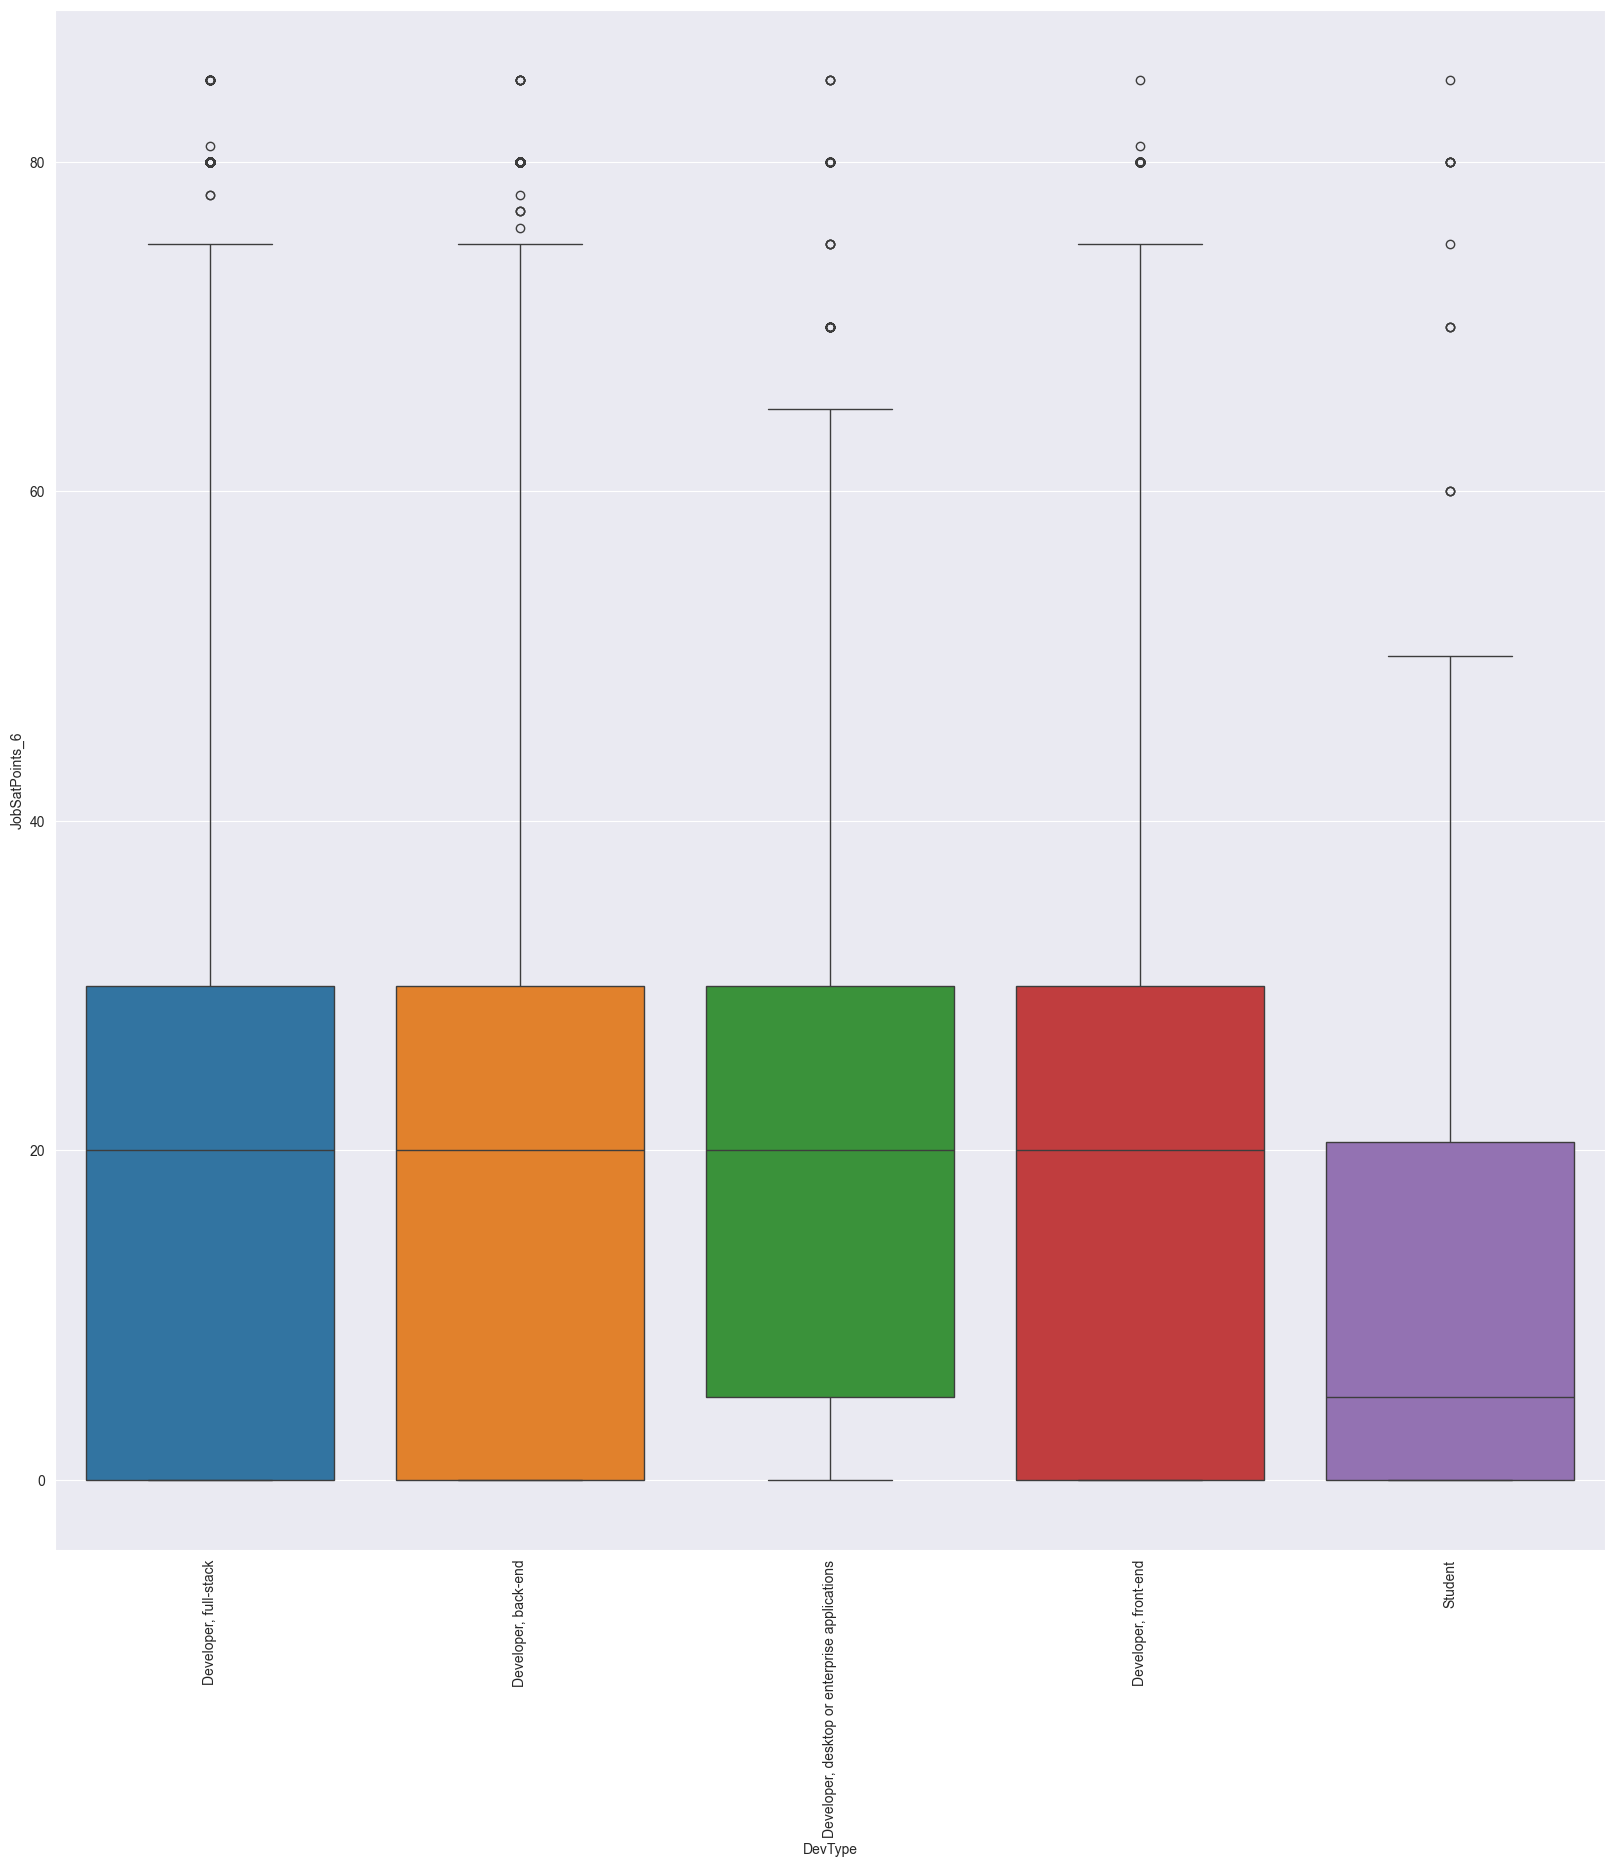

In [77]:
plt.figure(figsize=(20,20))
sns.boxplot(data=filtered, x='DevType', y='JobSatPoints_6',hue='DevType')
plt.xticks(rotation=90)
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


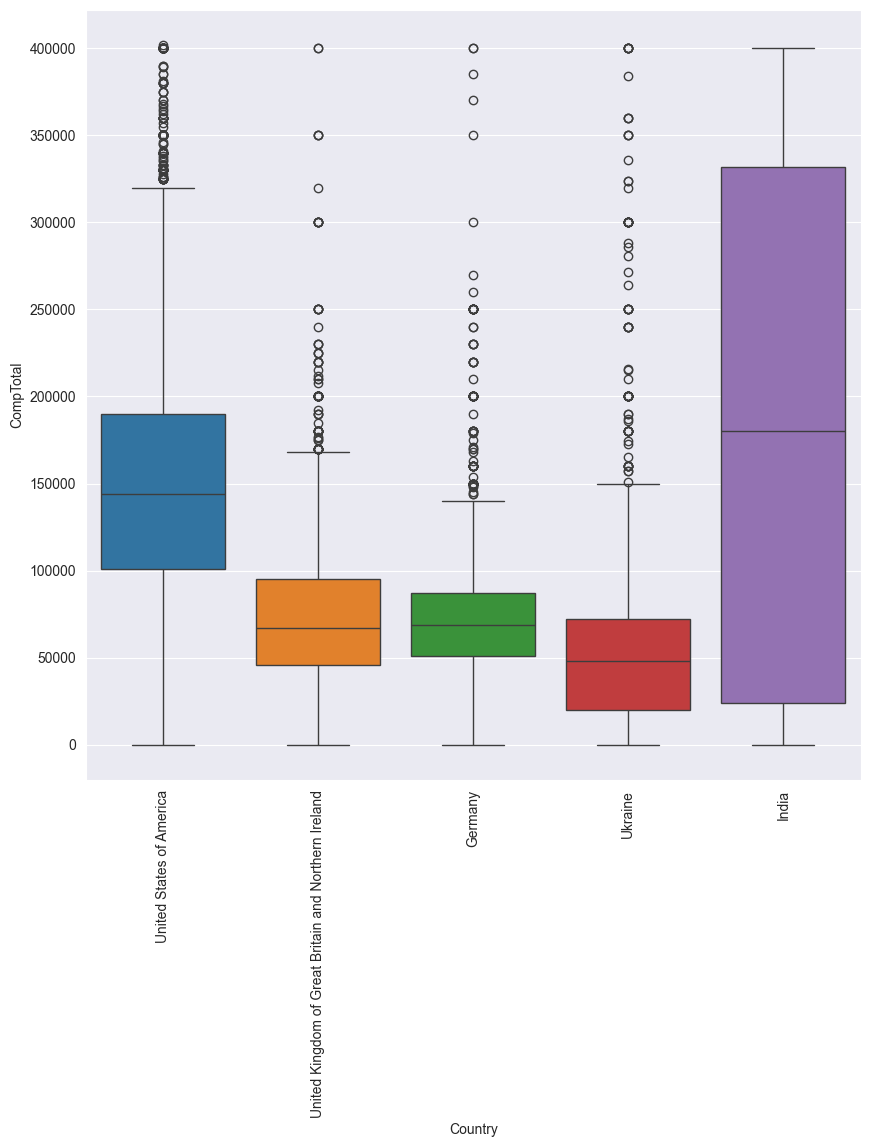

In [78]:
# your code goes here
filtered = pd.read_sql_query('''
    SELECT Country, CompTotal 
    FROM main 
    WHERE Country IN (
        SELECT Country 
        FROM main 
        GROUP BY Country 
        ORDER BY COUNT(Country) DESC 
        LIMIT 5
    )
''', conn)
filtered = filtered.dropna()
filtered = remove_outliers(filtered, 'CompTotal')
filtered
plt.figure(figsize=(10, 10))
sns.boxplot(data=filtered, x='Country', y='CompTotal', hue='Country')
plt.xticks(rotation=90)
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, 'Employed, full-time'),
  Text(1, 0, 'Independent contractor, freelancer, or self-employed'),
  Text(2, 0, 'Employed, full-time;Student, part-time'),
  Text(3, 0, 'Employed, full-time;Independent contractor, freelancer, or self-employed'),
  Text(4, 0, 'Employed, full-time;Student, full-time'),
  Text(5, 0, 'Student, part-time;Employed, part-time'),
  Text(6, 0, 'Student, full-time;Independent contractor, freelancer, or self-employed'),
  Text(7, 0, 'Retired'),
  Text(8, 0, 'Independent contractor, freelancer, or self-employed;Employed, part-time'),
  Text(9, 0, 'Not employed, but looking for work'),
  Text(10, 0, 'Employed, part-time'),
  Text(11, 0, 

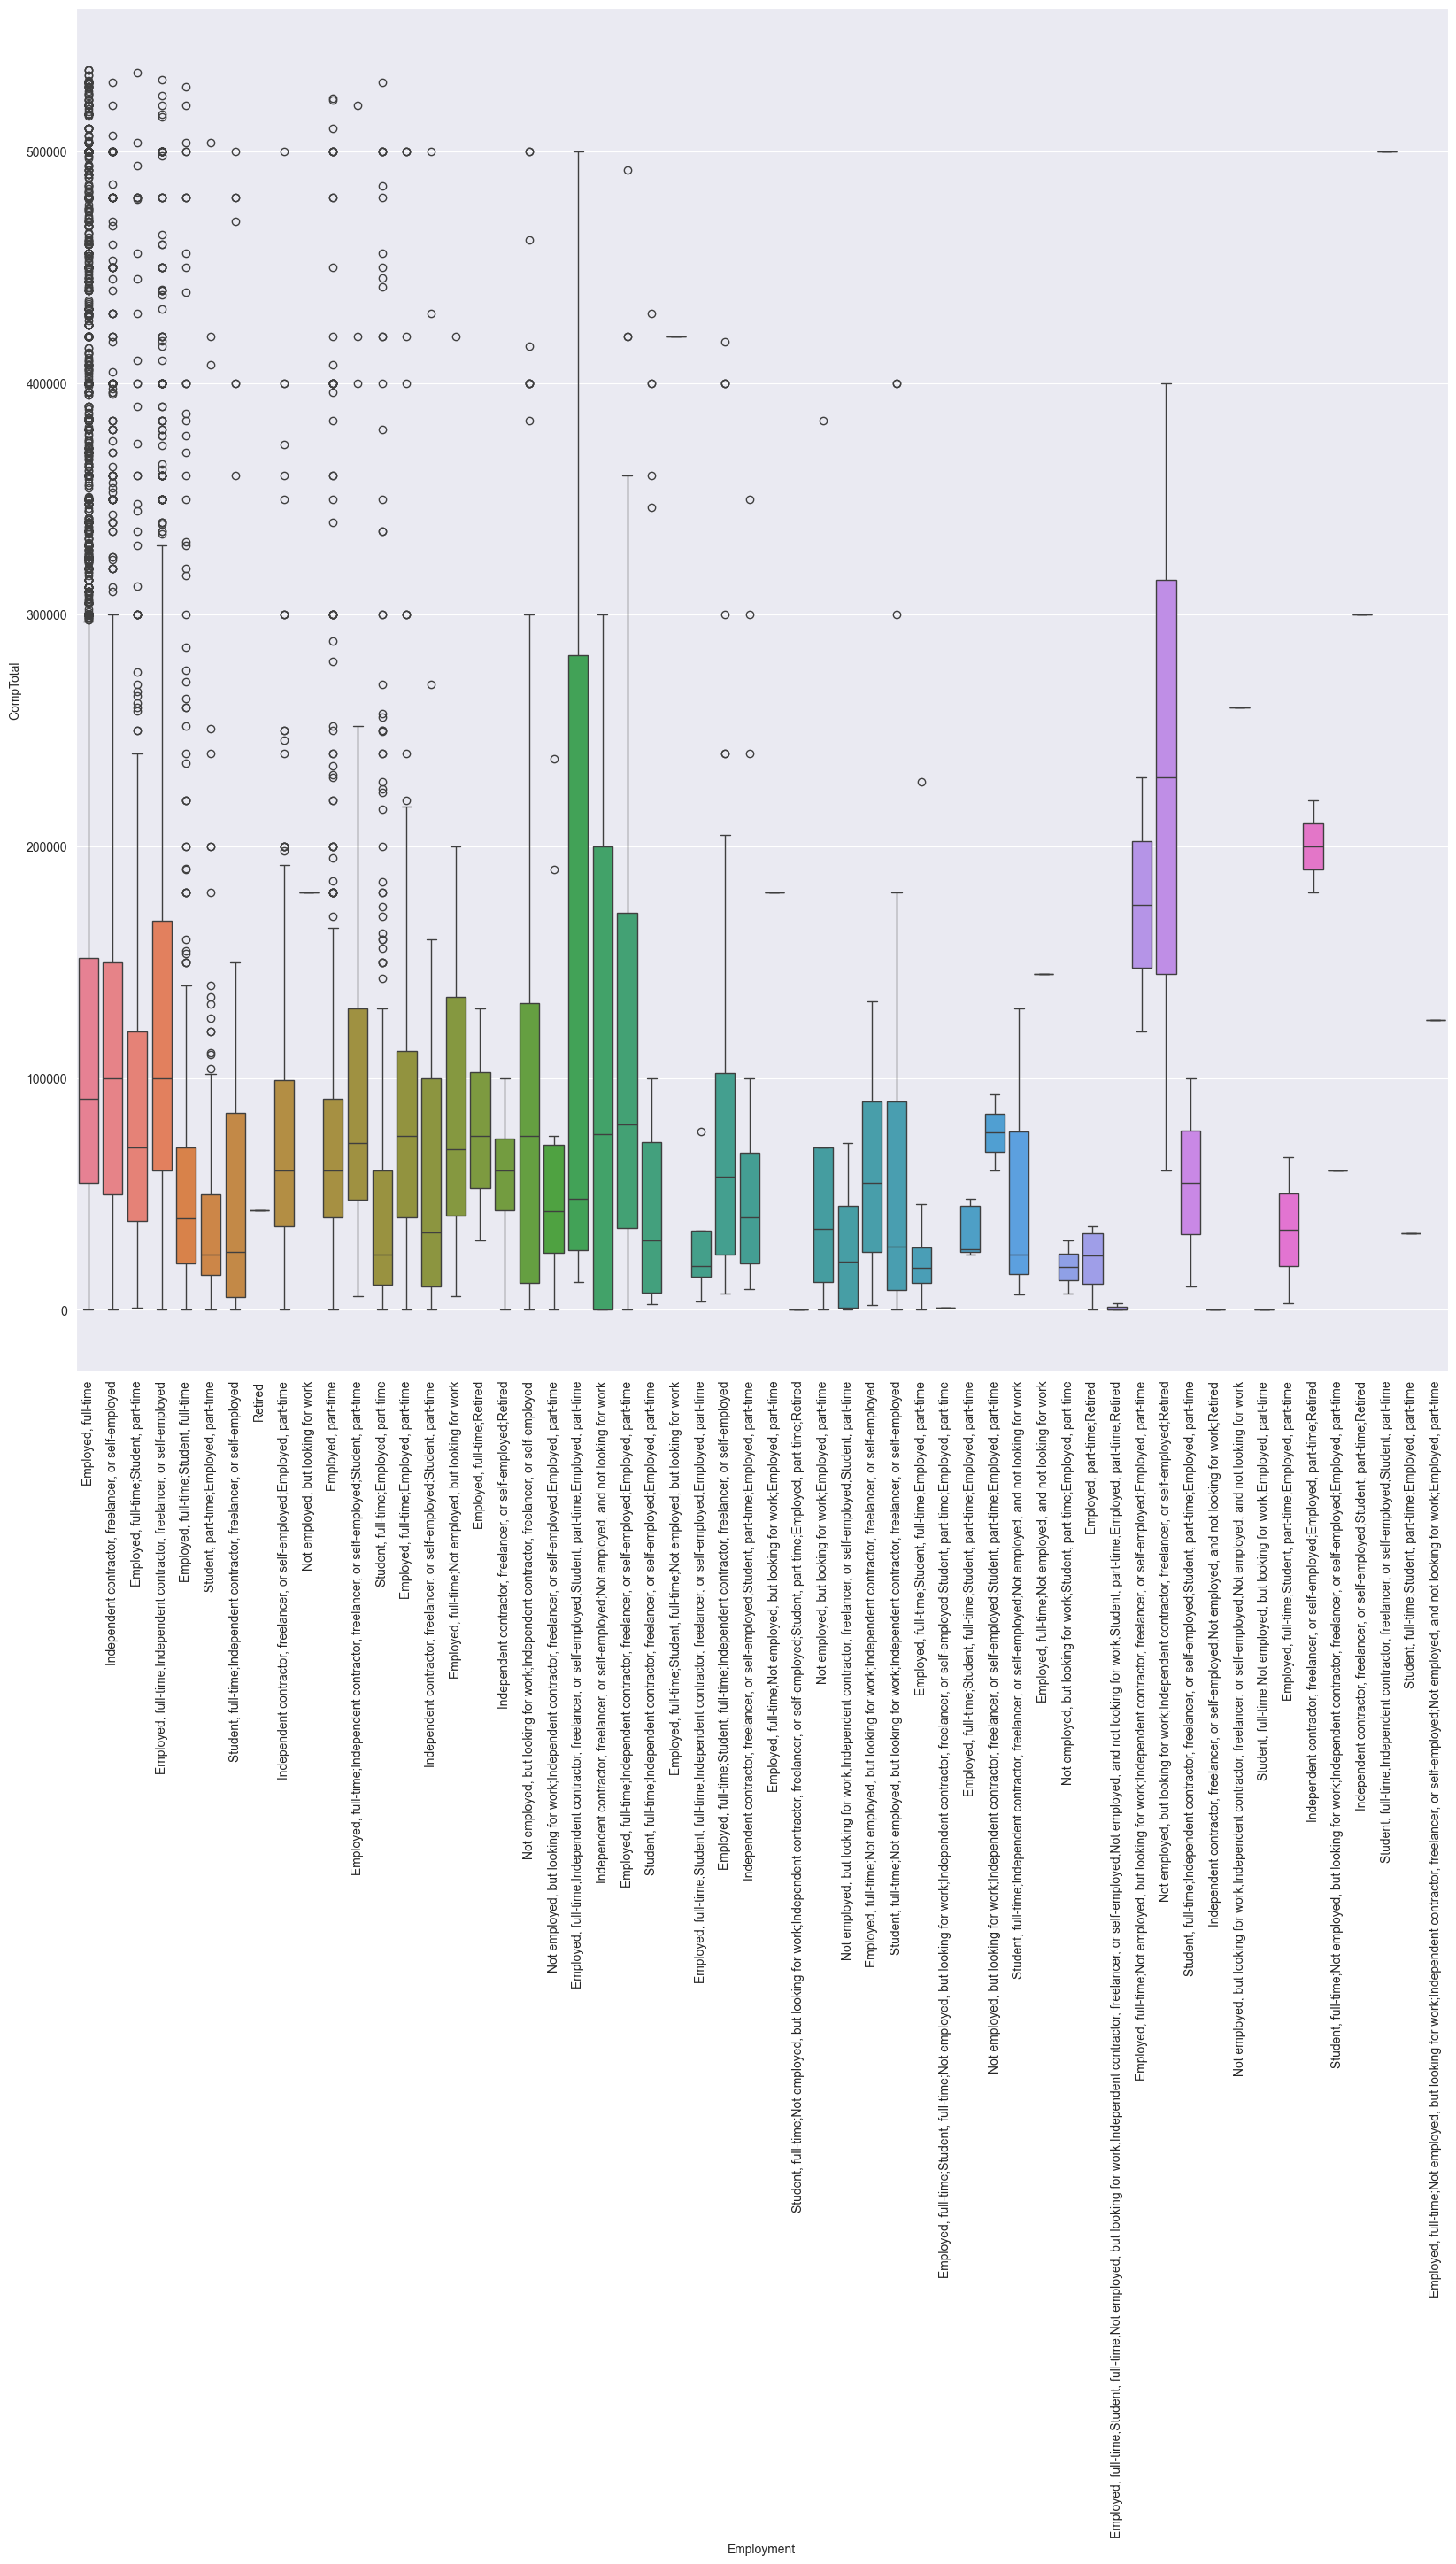

In [79]:
# your code goes here
filtered = pd.read_sql_query('''select Employment, CompTotal from main''', conn)
filtered = filtered.dropna()
filtered = remove_outliers(filtered, 'CompTotal')
plt.figure(figsize=(20,20))
sns.boxplot(data=filtered, x='Employment', y='CompTotal', hue='Employment')
plt.xticks(rotation=90)

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51],
 [Text(0, 0, '1'),
  Text(1, 0, '10'),
  Text(2, 0, '11'),
  Text(3, 0, '12'),
  Text(4, 0, '13'),
  Text(5, 0, '14'),
  Text(6, 0, '15'),
  Text(7, 0, '16'),
  Text(8, 0, '17'),
  Text(9, 0, '18'),
  Text(10, 0, '19'),
  Text(11, 0, '2'),
  Text(12, 0, '20'),
  Text(13, 0, '21'),
  Text(14, 0, '22'),
  Text(15, 0, '23'),
  Text(16, 0, '24'),
  Text(17, 0, '25'),
  Text(18, 0, '26'),
  Text(19, 0, '27'),
  Text(20, 0, '28'),
  Text(21, 0, '29'),
  Text(22, 0, '3'),
  Text(23, 0, '30'),
  Text(24, 0, '31'),
  Text(25, 0, '32'),
  Text(26, 0, '33'),
  Text(27, 0, '34'),
  Text(28, 0, '35'),
  Text(29, 0, '36'),
  Text(30, 0, '37'),
  Text(31, 0, '38'),
  Text(32, 0, '39'),
  Text(33, 0, '4'

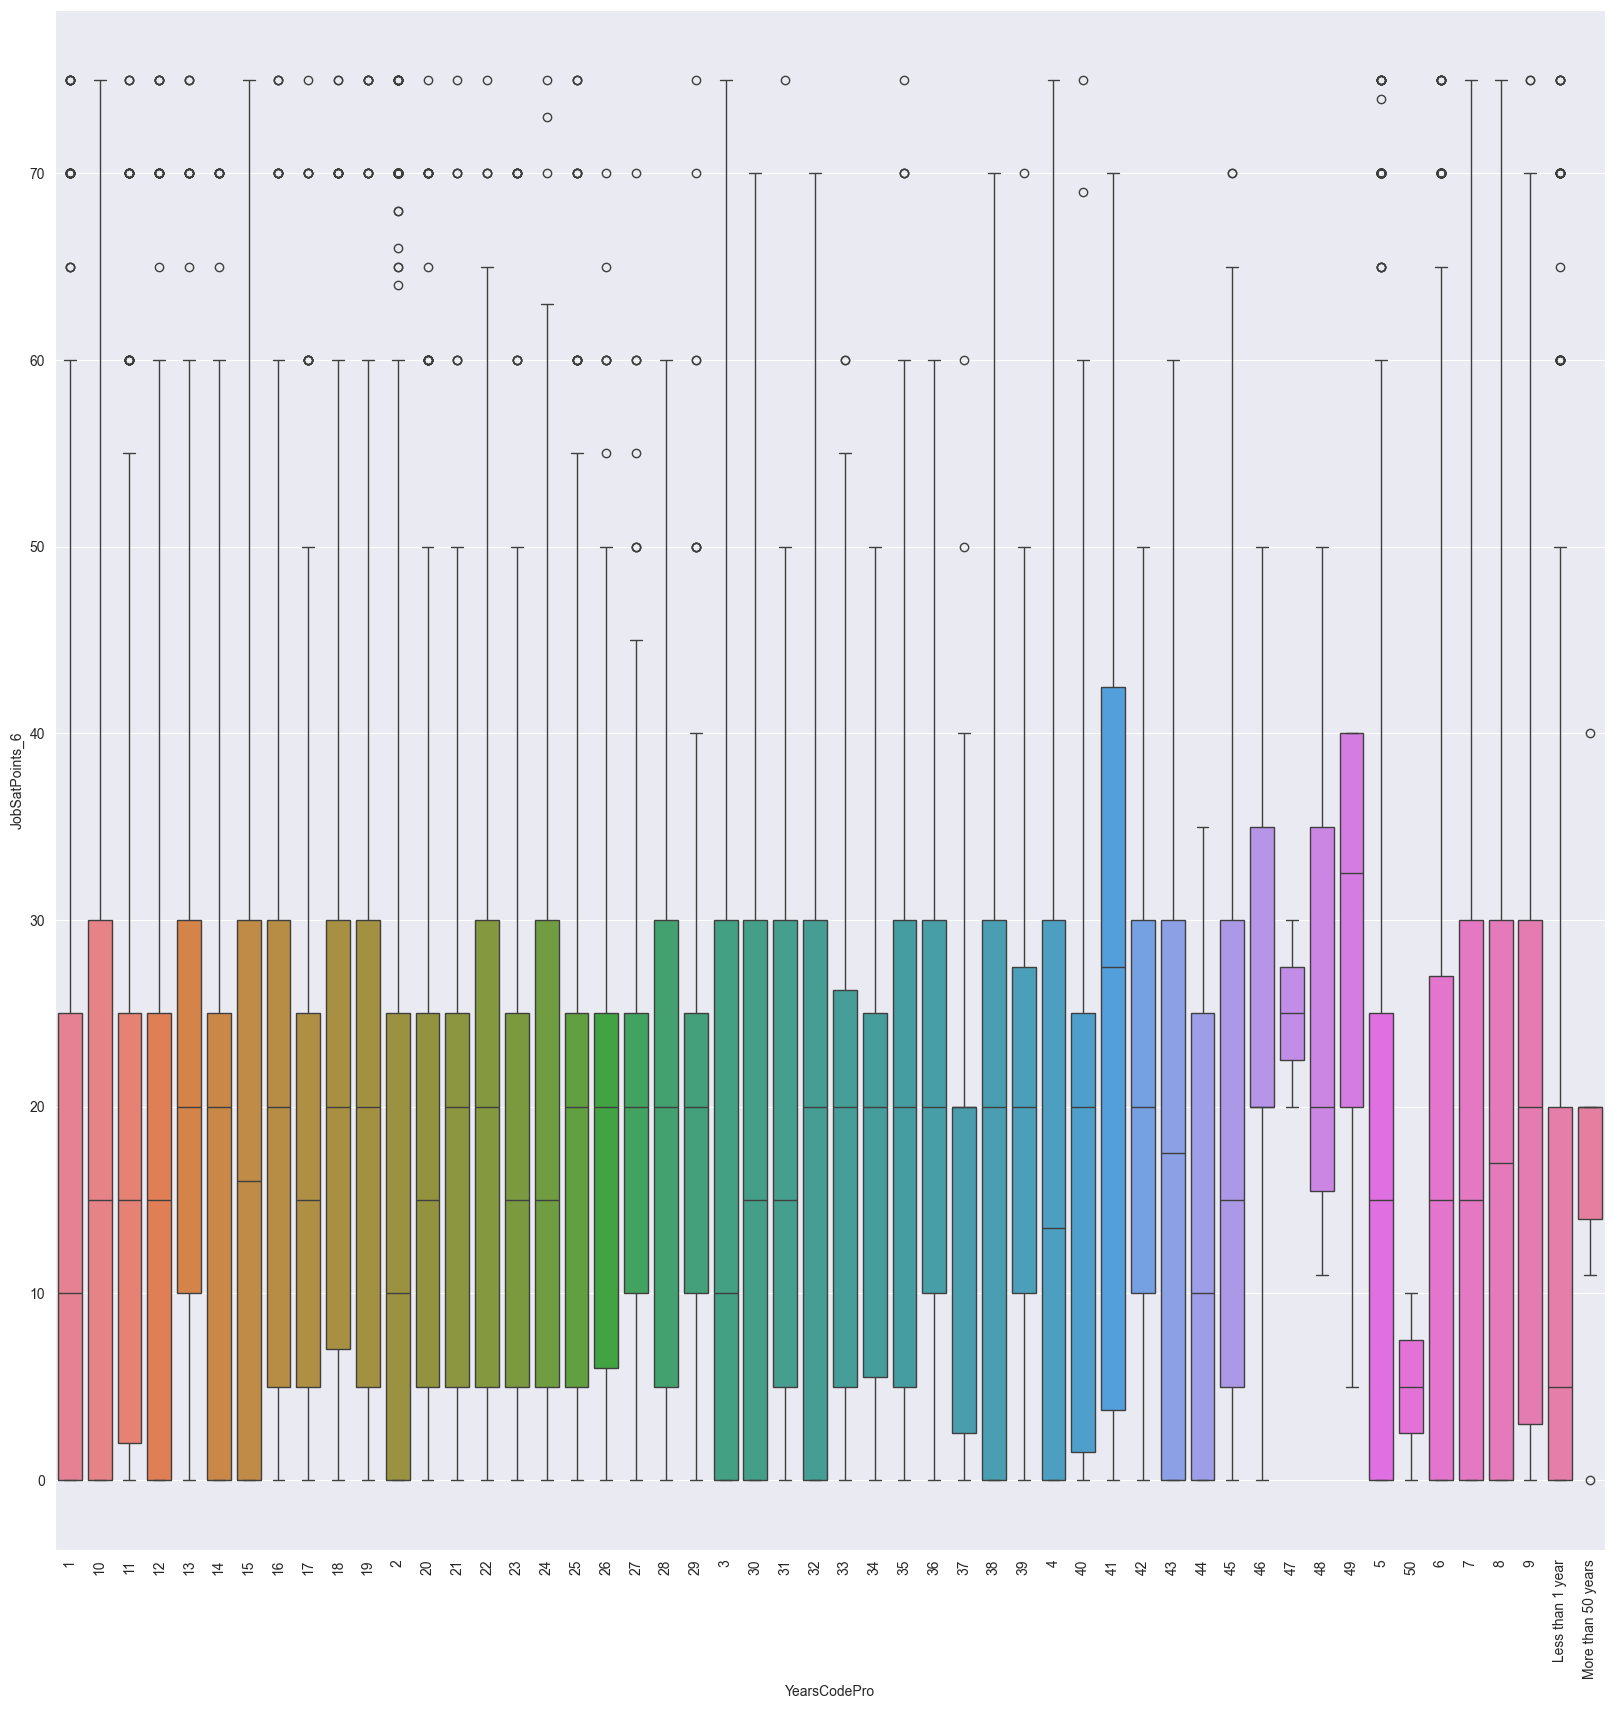

In [82]:
# your code goes here
filtered = pd.read_sql_query('''select YearsCodePro, JobSatPoints_6 from main order by YearsCodePro''', conn)
filtered = filtered.dropna()
filtered = remove_outliers(filtered, 'JobSatPoints_6')
plt.figure(figsize=(20,20))
sns.boxplot(data=filtered, x='YearsCodePro', y='JobSatPoints_6', hue='YearsCodePro')
plt.xticks(rotation=90)

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [83]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
